In [43]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from math import ceil
from scipy import linalg

# Gráficos
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

# Preprocesado y análisis
# ==============================================================================
import pingouin as pg
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from IPython.display import Image

from sklearn import metrics
# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [7]:
datos = pd.read_csv('OnlineNewsPopularity.csv')

In [8]:
#se borran espacios en las keys de cada columna
datos.columns = datos.columns.str.replace(' ', '')

In [9]:
# for col in datos.columns:
#   se dropea URL ya que para efectos de este trabajo no sirve
datos.drop(columns=['url'],inplace=True)
datos.keys()
# print(datos[' shares'])

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'glob

In [10]:
# plt.figure(figsize=(40,40))
# sns.heatmap(data=datos.corr(),annot=True,cmap='Blues')

In [11]:
#removing outliers
Q1 = datos.quantile(q=0.25) 

Q3 = datos.quantile(q=0.75)

IQR = Q3-Q1
print('IQR for each column:- ')
print(IQR)

IQR for each column:- 
timedelta                        3.780000e+02
n_tokens_title                   3.000000e+00
n_tokens_content                 4.700000e+02
n_unique_tokens                  1.378252e-01
n_non_stop_words                 4.314000e-09
n_non_stop_unique_tokens         1.288902e-01
num_hrefs                        1.000000e+01
num_self_hrefs                   3.000000e+00
num_imgs                         3.000000e+00
num_videos                       1.000000e+00
average_token_length             3.764347e-01
num_keywords                     3.000000e+00
data_channel_is_lifestyle        0.000000e+00
data_channel_is_entertainment    0.000000e+00
data_channel_is_bus              0.000000e+00
data_channel_is_socmed           0.000000e+00
data_channel_is_tech             0.000000e+00
data_channel_is_world            0.000000e+00
kw_min_min                       5.000000e+00
kw_max_min                       5.550000e+02
kw_avg_min                       2.152500e+02
kw_min_max 

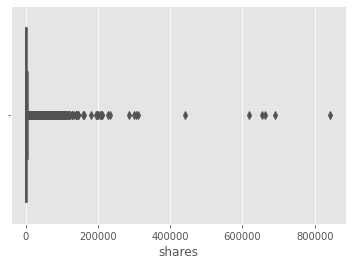

In [12]:

sns.boxplot(datos['shares'])
plt.show()

In [13]:
# primero ordenamos nuneros de menor a mayor para relaizar un procesado de datos anomalos ya que como se ve en los 
# graficos anteriores se tiene muchos
numeros_escalados = datos.sort_values('shares') 
q1 = numeros_escalados['shares'].quantile(q=0.25) 
q3 = numeros_escalados['shares'].quantile(q=0.75) 
# calculo de rango intercuartil
iqr = q3-q1
print("q1 =", q1 , " ", "iqr = ", iqr )

q1 = 946.0   iqr =  1854.0


In [14]:
interno = q1-(iqr*1.5) 
print("borde interno =", interno ) 

externo = q3+(iqr*1.5)  
print("borde externo =", externo) 

datos.info()

borde interno = -1835.0
borde externo = 5581.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timedelta                      39644 non-null  float64
 1   n_tokens_title                 39644 non-null  float64
 2   n_tokens_content               39644 non-null  float64
 3   n_unique_tokens                39644 non-null  float64
 4   n_non_stop_words               39644 non-null  float64
 5   n_non_stop_unique_tokens       39644 non-null  float64
 6   num_hrefs                      39644 non-null  float64
 7   num_self_hrefs                 39644 non-null  float64
 8   num_imgs                       39644 non-null  float64
 9   num_videos                     39644 non-null  float64
 10  average_token_length           39644 non-null  float64
 11  num_keywords                   39644 non-null  float64
 12 

In [15]:
# Pr = post reduccion
Pr = datos[datos['shares']<=externo]

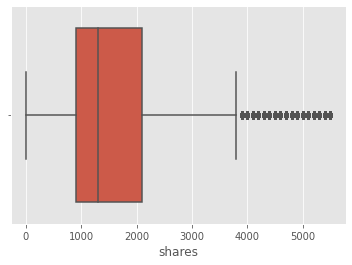

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35103 entries, 0 to 39643
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timedelta                      35103 non-null  float64
 1   n_tokens_title                 35103 non-null  float64
 2   n_tokens_content               35103 non-null  float64
 3   n_unique_tokens                35103 non-null  float64
 4   n_non_stop_words               35103 non-null  float64
 5   n_non_stop_unique_tokens       35103 non-null  float64
 6   num_hrefs                      35103 non-null  float64
 7   num_self_hrefs                 35103 non-null  float64
 8   num_imgs                       35103 non-null  float64
 9   num_videos                     35103 non-null  float64
 10  average_token_length           35103 non-null  float64
 11  num_keywords                   35103 non-null  float64
 12  data_channel_is_lifestyle      35103 non-null 

In [16]:
# grafico de outliers para ver como quedo shares desepues de la reduccion
sns.boxplot(Pr['shares'])
plt.show()
Pr.info()

In [17]:
mediana , media = Pr['shares'].median(), Pr['shares'].mean()
print("mediana = ", mediana, " ", "media = ", media)

mediana =  1300.0   media =  1671.9726519100932


In [18]:
# se hace un cambio para clasificar popular y inpopular mediante la mediana, si mayor
# se le asigna un 1 si es menor un 0 
Pr['shares'] = Pr['shares'].apply(lambda x: 0 if x <mediana  else 1)

In [19]:
Pr['shares'].value_counts()

1    18353
0    16750
Name: shares, dtype: int64

In [20]:
# como se puede ver del resultado anterior los datos de la varible objetivo estan relativamente bien distribuidos
# una diferencia de menos de 2.000 datos es poco considerando que se tienen mas de 35.000. por esto no sera necesario
# aplicar algun metodo de arreglo de distribucion como SMOTE o escalado.
X = Pr.drop('shares',axis=1)
Y = Pr['shares']

In [23]:
#crear modelo para knn
knn_cv = KNeighborsClassifier(n_neighbors=3)
#entenar modelo con cv 5
cv_scores = cross_val_score(knn_cv, X, Y, cv=5)

In [24]:
#imprimir cada score de cv score de precicion y promedio
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.51801738 0.50833215 0.5496368  0.54458689 0.53888889]
cv_scores mean:0.5318924220419733


In [25]:
from sklearn.metrics import (accuracy_score, log_loss, classification_report,f1_score,confusion_matrix)

In [26]:
train, test, target_train, target_val = train_test_split(X, Y, test_size=0.70, random_state=0)

In [36]:
LR = LogisticRegression(multi_class='auto')
LR.fit(train,target_train)
lr_pred = LR.predict(test)


accuracy: 0.5777886297969316
f1 score:  [0.53755293 0.61158324]


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

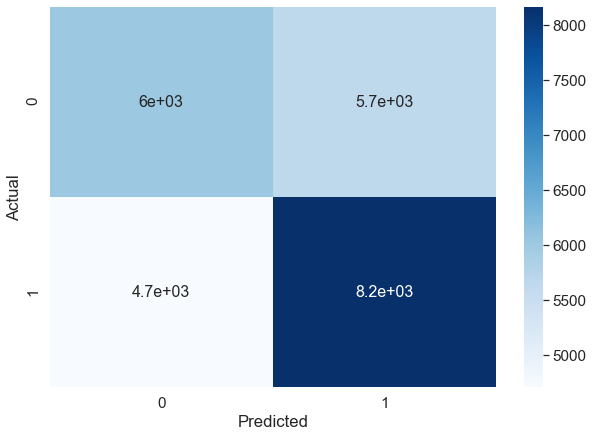

In [41]:
data = confusion_matrix(target_val,lr_pred)
df_cm = pd.DataFrame(data, columns=np.unique(target_val), index = np.unique(target_val))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [45]:
seed = 0
params = {
    'n_estimators':range(10,100,10),
    'criterion':['gini','entropy'],
}
rf = RandomForestClassifier()
rs = RandomizedSearchCV(rf, param_distributions=params, scoring='accuracy', n_jobs=-1, cv=5, random_state=42)
rs.fit(X,Y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'n_estimators': range(10, 100, 10)},
                   random_state=42, scoring='accuracy')

In [53]:
rs.best_params_

{'n_estimators': 70, 'criterion': 'entropy'}

In [54]:
rf = RandomForestClassifier(**rs.best_params_)
rf.fit(train, target_train)
rf_pred = rf.predict(test)

Text(0.5, 0, 'importancia relativa a random forrest')

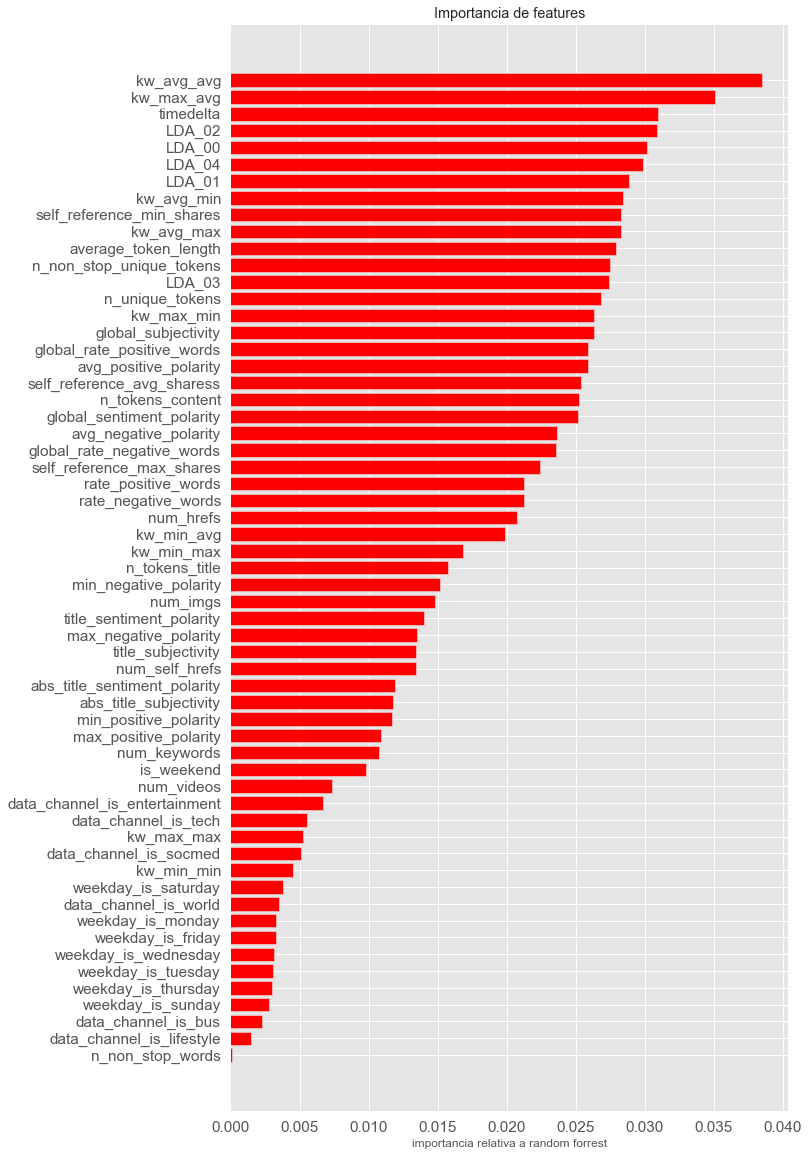

In [58]:
features = Pr.columns
importance = rf.feature_importances_
indices = np.argsort(importance)
plt.figure(1,figsize=(10,20))
plt.title('Importancia de features')
plt.barh(range(len(indices)), importance[indices], color='red', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('importancia relativa a random forrest')

In [67]:
print("")
print("RANDOM FOREST.........................................................")
print("accuracy random forest: ", accuracy_score(target_val,rf_pred))
print("f1 score de random forest", f1_score(target_val,rf_pred,average=None))
print("")
print("REGRESION LOGISTICA ..................................................")
print("accuracy para regresion logistica:", accuracy_score(target_val,lr_pred))
print("f1 score para regresion logistica: ", f1_score(target_val,lr_pred,average=None))
print("")
print("KNN CROSSVALIDATION ..................................................")
print("KNN cross validation scores: ", cv_scores)
print('cv_scores promedio:{}'.format(np.mean(cv_scores)))


RANDOM FOREST.........................................................
accuracy random forest:  0.6558417775607374
f1 score de random forest [0.63872869 0.67140692]

REGRESION LOGISTICA ..................................................
accuracy para regresion logistica: 0.5777886297969316
f1 score para regresion logistica:  [0.53755293 0.61158324]

KNN CROSSVALIDATION ..................................................
KNN cross validation scores:  [0.51801738 0.50833215 0.5496368  0.54458689 0.53888889]
cv_scores promedio:0.5318924220419733


[0.63872869 0.67140692]
